## Question 5

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os
import numpy as np
from matplotlib.ticker import PercentFormatter
from scipy.stats import mannwhitneyu, kstest, ttest_ind
from sklearn.model_selection import train_test_split

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from src.analysis_helpers import side_by_side_bar_plot, get_value_counts, distribution_plots

ImportError: cannot import name 'ComplexWarning' from 'numpy.core.numeric' (/Users/josephtadros/anaconda3/lib/python3.11/site-packages/numpy/core/numeric.py)

In [39]:
((df["male_gender"] == 1) & (df["female_gender"] == 1)).sum()

np.int64(10984)

In [ ]:
df = pd.read_csv("../data/processed/repeated_records.csv")

In [36]:
difficulty_male = df["average_difficulty"].loc[df["male_gender"] == 1]
difficulty_female = df["average_difficulty"].loc[df["female_gender"] == 1]

In [56]:
gender_counts = [
    ((df["male_gender"] == 1) & (df["female_gender"] == 0)).sum(),
    ((df["male_gender"] == 0) & (df["female_gender"] == 1)).sum(),
    ((df["male_gender"] == 1) & (df["female_gender"] == 1)).sum(),
    ((df["male_gender"] == 0) & (df["female_gender"] == 0)).sum(),
]

gender_categories = [
    "Only Male",
    "Only Female",
    "Both",
    "None"
]

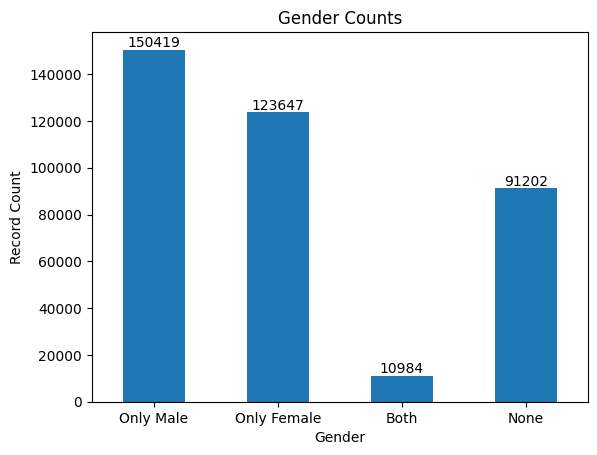

In [59]:
# Plot counts of participant genders
x_values = gender_categories
y_values = gender_counts

df_bars = pd.DataFrame({
        "x": x_values,
        "y": y_values
    })

ax = df_bars.plot(kind="bar", x="x", y="y", legend=False)  # Bar plot
ax.bar_label(ax.containers[0])  # Add value labels on top of each bar
plt.xticks(rotation=-0)  # Keep x tick labels horizontal
plt.title("Gender Counts")
plt.xlabel("Gender")
plt.ylabel("Record Count")
plt.show()

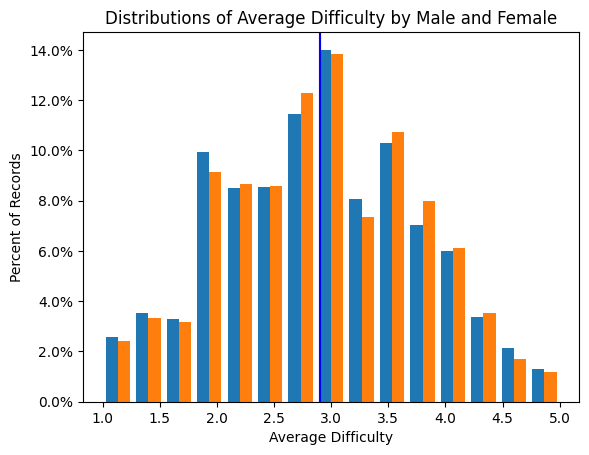

In [ ]:
average_difficulty_columns = "average_difficulty"  # Column name for shrek movies
shrek_reviews_female = df[average_difficulty_columns].loc[df["male_gender"] == 1]  # Split into male reviews
shrek_reviews_male = df[average_difficulty_columns].loc[df["female_gender"] == 1]  # Split into female reviews

plt.hist(
    [shrek_reviews_male, shrek_reviews_female],
    bins=15, 
    weights=[
        np.ones(len(shrek_reviews_male)) / len(shrek_reviews_male), 
        np.ones(len(shrek_reviews_female)) / len(shrek_reviews_female)
    ]
)

plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xlabel("Average Difficulty")
plt.ylabel("Percent of Records")
plt.title("Distributions of Average Difficulty by Male and Female")
plt.show()

In [93]:
U1, p = mannwhitneyu(shrek_reviews_male, shrek_reviews_female)
print(f"U statistic is {U1}")
print(f"p-value is {p}")

U statistic is 10758062708.0
p-value is 3.847553313433516e-06


In [110]:
print(f"Male average difficulty median {shrek_reviews_male.median()}")
print(f"Female average difficulty median {shrek_reviews_female.median()}")

Male average difficulty median 2.9
Female average difficulty median 2.9


In [133]:
ranked_difficulties = df["average_difficulty"].rank(method="average")
ranked_difficulties_male = df["average_difficulty"].loc[df["male_gender"] == 1]
ranked_difficulties_female = df["average_difficulty"].loc[df["female_gender"] == 1]

print(f"Male average rank {ranked_difficulties_male.mean()}")
print(f"Female average rank {ranked_difficulties_female.mean()}")

Male average rank 2.9008804049491026
Female average rank 2.888671999762314


## Question 7

In [ ]:
y = df["average_difficulty"]
X = df[[
    "number_of_ratings",
     "received_a_pepper",
     "would_take_again",
     "number_of_ratings_online",
     "male_gender",
     "female_gender",
]]

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

NameError: name 'train_test_split' is not defined

In [ ]:
# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r_squared = model.score(X_test_scaled, y_test)
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'R-squared Score: {r_squared:.4f}')

# View coefficients (some may be exactly zero)
coefficients = pd.Series(model.coef_, index=load_diabetes().feature_names)
print('\nCoefficients:')
print(coefficients[coefficients != 0].sort_values(ascending=False))
